# Goals
In this colab you will:
* Brainstorm how to use AI for sustainability and conservation, and to combat climate change.
* Learn the ways in which naturally occuring bacteria can help increase plant growth and reforestation.
* Examine a dataset, and build a machine learning model to predict crop yield from soil composition.
* OPTIONALLY: Learn how scientists collect data about bacterial composition of an environment & measure the number of different bacteria in soils using DNA sequences.

In [1]:
#@title ### Setup notebook.
!gdown --id 1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp # sample metadata
!gdown --id 1Df7xqxCbENHB4oeovf2dYpx9_3dyYEYv # 16S_counts
!gdown --id 15SQ9C5r_ExRGTiX3zehu959lKW_LrrBp # bacteria_counts
!gdown --id 1yeBvAHeULU4Vk_TeAtWuF8kZRhyNCNa- # sequence_to_species_dict

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

metadata = pd.read_table('sample_metadata.tsv')
metadata.index = ['farm_%i' %i for i in range(len(metadata))]

sequences_counts = pd.read_table('16S_counts.tsv')
sequences_counts.index = ['farm_%i' % i for i in range(len(sequences_counts))]

bacteria_counts = pd.read_table('bacteria_counts.tsv')
bacteria_counts.index = ['farm_%i' % i for i in range(len(bacteria_counts))]
cols = list(bacteria_counts.columns)
np.random.seed(42)
np.random.shuffle(cols)
bacteria_counts = bacteria_counts[cols]
sequence_to_species_dict = np.load('sequence_to_species_dict.npy', allow_pickle=True).item()

bacteria_counts = bacteria_counts.drop(['Unnamed: 0'], axis=1) 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp
To: /content/sample_metadata.tsv
100% 64.3k/64.3k [00:00<00:00, 10.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Df7xqxCbENHB4oeovf2dYpx9_3dyYEYv
To: /content/16S_counts.tsv
100% 49.3M/49.3M [00:00<00:00, 174MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...

# People Health and Planet Health

<img src="https://www.gstatic.com/earth/social/00_generic_facebook-001.jpg" alt="drawing" width="1000" height="300"/>





In almost all of the problems we've worked on in this course so far, the goal is to improve the lives and health of people around the world (and dogs that have tendencies to run into the street!).  But we're forgetting the health of someone else pretty important.... Mother Earth!

 **Discuss: What does planet health mean to you?**

Some people feel that people health and planet health are sometimes at odds with each other.  That is, people should make sacrifices (like driving less, opt to buy more expensive but sustainable goods, etc.) in order to save the planet. Others think that people health and planet health go hand-in-hand. A healthier global ecosystem means a healthier human!  

####**Discuss: Which do you think?**


#### **Exercise: Brainstorm one problem that pits planet health *against* people health, and one problem where planet health and people health go hand-in-hand.**


In [ ]:
_people_vs_planet_ = 'long distance transportation' #@param {type:"string"}
_hand_in_hand_ = '' #@param {type:"string"}
print('Example answers: \n Plane travel is extremely carbon-expensive, \n but many people enjoy travelling or visiting people far away.  \n On the other hand, water pollution affects the health of local \n animals, plants, and humans.')

Example answers: 
 Plane travel is extremely carbon-expensive, 
 but many people enjoy travelling or visiting people far away.  
 On the other hand, water pollution affects the health of local 
 animals, plants, and humans.


# Sustainable Farming and AI

One way we can improve both people and planet health is through better farming practices. More efficient and effective farming practices can have greater crop yields while using less land, energy, and harmful chemcals.  The world is projected to have 9 billion people by 2050... How can we make sure we are able to nourish 9 billion people while also nourishing our planet?

If you haven't already done so, please read [this](https://www.nationalgeographic.com/foodfeatures/feeding-9-billion/) article on 5 proposed steps to sustainably feeding the world.


"*Just as electricity transformed almost everything 100 years ago, today I actually have a hard time thinking of an industry that I don't think AI will transform in the next several years.*" -- Andrew Ng


So, why not planet earth and sustainable farming too?

#### **Exercise: Brainstorm a way AI could aid in each of the 5 proposed steps to sustainable farming.**


In [ ]:
_1_ = 'Freeze Agriculture\u2019s Footprint' #@param {type:"string"}
_2_ = 'Grow More on Farms We\u2019ve Got' #@param {type:"string"}
_3_ = 'Use Resources More Efficiently' #@param {type:"string"}
_4_ = 'Shift Diets' #@param {type:"string"}
_5_ = 'Reduce Waste' #@param {type:"string"}


# Let's look at some farms!

<img src="https://cdn.pixabay.com/photo/2017/08/02/10/31/farming-2570803_1280.jpg" width=500>

Here is a dataset with crop yields and other information from different farms (stored in the variable ```metadata```).  Go ahead and explore the dataset. We've written a little bit of code to get you started.


In [2]:
metadata.head()

,crop_yield,sample_type,country,timestamp
farm_0,0.68,barley soil sample,GAZ:Australia,2011-3-26
farm_1,1.00,barley soil sample,GAZ:Australia,2011-11-22
farm_2,0.87,barley soil sample,GAZ:Australia,2011-6-10
farm_3,0.68,barley soil sample,GAZ:Australia,2011-11-3
farm_4,0.67,barley soil sample,GAZ:Australia,2011-3-26


####**Exercise: Using the metadata & pandas, answer the following:**
1. Where did these samples come from?
2. For what type of plant was the yield measured?
3. Were all of these samples collected on the same day?

In [ ]:
_1_ = 'farm in Australia' #@param {type:"string"}
_2_ = 'barley soil' #@param {type:"string"}
_3_ = 'no' #@param {type:"string"}

### **Exercise: Plot a histogram of the crop yields.  What do you observe from the histogram?**

Take a look at [the `histplot` documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html) and play around with some of the optional parameters. How does your graph change?

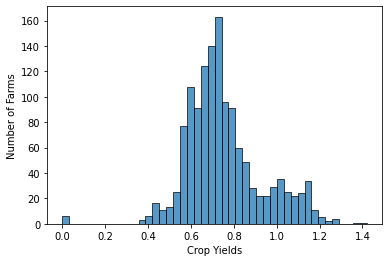

In [3]:
ax = sns.histplot(data=metadata['crop_yield'])
ax.set(xlabel= "Crop Yields", ylabel= "Number of Farms") ### FILL IN ###
plt.show()

In this class we are going to use some interesting measurements (I won't spoil what these are just yet!) in order to predict how well plants or crops will grow (called *yield*) in a certain locale. 

**Discuss: What "step" in the previous article would this fall under?**

####**Exercise: Brainstorm 3 attributes of soil (ie *features*) we could measure to predict crop yield?** It's ok if you aren't a chemistry or plant biology whiz -- get creative! Anything goes!


In [ ]:
_1_ = 'Bacteria levels' #@param {type:"string"}
_2_ = 'Nitrogen levels' #@param {type:"string"}
_3_ = 'Moisture levels' #@param {type:"string"}

# Predicting Crop Yield From....



<img src="https://t4.ftcdn.net/jpg/01/30/73/43/360_F_130734330_mSBGYTwuGvaHhEoyHlDov6ELFHO4cexF.jpg" alt="drawing" width="1000" height="500"/>

 

#.... Bacteria!





Scientists have discovered that the soil microbiome, the collection of bacteria that live in a region of soil play an important role in the health of plants! (Interestingly, the bacteria that live in the human intestines also play an important role in the health of humans!). Therefore, maybe we can predict how well plants will grow in a region based on the bacterial composition of the soil. 

Here is a short [tutorial](https://www.khanacademy.org/science/biology/bacteria-archaea/prokaryote-metabolism-ecology/a/prokaryote-interactions-ecology) on the role of prokaryotes (bacteria) in ecosystems that you can read if you want to learn more.


So, maybe we actually need to think *smaller* when it comes to sustainabity!  Like, so small you need a microscope ;)

<img src="https://st2.depositphotos.com/1967477/6350/v/950/depositphotos_63507731-stock-illustration-cartoon-bacteria-collection-set.jpg
" alt="drawing" width="300" >


# Examining Our Dataset

Let's take a look at what these bacteria composition datasets look like! Go ahead and run the following line of code to examine your dataset.

In [4]:
bacteria_counts.head()

,Xanthomonadales,Glutamicibacter,Geobacillus,Rickettsia,Armatimonadales,Phaselicystis,Gammaproteobacteria,Candidatus Berkiella,Lawsonella,Hungateiclostridiaceae,...,Dyella,Proteobacteria,C0119,Vampirovibrionaceae,Abditibacterium,Arenimonas,Blastococcus,Haemophilus,Peptoclostridium,Beutenbergiaceae
farm_0,0.0,0.0,0.0,0.0,0.0,2.0,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
farm_1,156.0,0.0,0.0,0.0,0.0,77.0,236.0,10.0,0.0,0.0,...,0.0,0.0,32.0,0.0,15.0,17.0,94.0,0.0,0.0,0.0
farm_2,133.0,0.0,0.0,7.0,95.0,60.0,1164.0,13.0,0.0,4.0,...,0.0,0.0,66.0,0.0,9.0,16.0,14.0,0.0,0.0,0.0
farm_3,199.0,0.0,0.0,0.0,0.0,95.0,274.0,0.0,0.0,0.0,...,0.0,0.0,73.0,0.0,2.0,15.0,54.0,0.0,0.0,1.0
farm_4,0.0,0.0,0.0,0.0,0.0,0.0,2265.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Exercise: What do the rows and columns represent?**

In [ ]:
rows = '' #@param {type:"string"}
columns = '' #@param {type:"string"}

#### **Exercise: Do a quick google search on 3 bacteria from your dataset. Write a brief description of the function & environment of each bacteria.**

Type your findings in the cell below, but no need to run the cell!

In [ ]:
_1_ = '' #@param {type:"string"}
_2_ = '' #@param {type:"string"}
_3_ = '' #@param {type:"string"}

# Cleaning Up The Data


<img src="https://live.staticflickr.com/7040/6878034144_02a2e37731_b.jpg" width=300>


Before building our machine learning model, we need to do a bit of preprocessing and data cleaning.

We will do 2 things in order to clean up our data:

1) We will get rid of any bacteria that are very low prevalence.

2) We will log-normalize our data.

## Removing Low Prevalence Bacteria

If a bacteria is so rare that it appears in $<$10 samples, that bacteria is not going to be helpful for building machine learning models that generalize to new data. We call these **singletons**. In order to reduce the amount of data we make the model crunch through, we will remove any features/bacteria that are low-prevalence.


###**Exercise: Fill out the code below to find the names of the bacteria that only appear in a single sample, and then remove them from your data.**

In [ ]:
low_prev_bacteria = []
bacteria = bacteria_counts.columns
for b in bacteria:
  if sum(bacteria_counts[b]>0)<10:  # If bacteria 'b' is a singleton,

    # Fill in the code below to add bacteria 'b' to the list of singletons.
    low_prev_bacteria = low_prev_bacteria + [b] 
    # low_prev_bacteria.append(b) 

# Fill in the code below to count the total number of singletons.
n_low_prevalence = len(low_prev_bacteria) 
print('%i bacteria are low prevalence.' % n_low_prevalence)

# The 'drop' function drops the columns specified from the bacteria_counts dataframe.
bacteria_counts_no_low_prev = bacteria_counts.drop(low_prev_bacteria, axis=1)

29 bacteria are low prevalence.


## Log-normalizing

**Discuss the following question: An apple tree grows 100 apples one year, and then 110 apples the next year.  Meanwhile, a pumpkin vine grows 10 pumpkins one year, and then 20 pumpkins the next year. Which plant do you feel like experienced a greater change between years?** 

Although the plants had the same change in *magnitude* of fruits, you probably feel like the pumpkin plant experienced a greater change because it doubled in fruit production, while the apple tree only increased fruit production by 10%. The pumpkin vine has a larger *relative* change year-to-year. In biology, we are often interested in relative changes as well. A trick for looking at relative changes in data is to use log normalization.

To log-normalize a number N, we do:

$N_{norm} = log(N+1)$

To take the log of a number in our code, we can use the `np.log` function. Take a look at [the documentation for the function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) if you'd like to see some examples of how it's used!



**Optional: Why do you think we also add 1? (Hint: What would happen if N equaled 0?)**

###**Exercise: Perform log-normalization on your dataset by filling out the following code.**


In [ ]:
# Fill out the following one-liner to log-normalize your data. Hint: numpy is 
# your friend! Remember, you should be performing log-normalization on the 
# bacteria_counts_no_low_prev dataframe. 
bacteria_counts_lognorm = np.log(bacteria_counts_no_low_prev+1) #### FILL THIS OUT. 


In [ ]:
bacteria_counts_lognorm.to_csv('bacteria_counts_lognorm.csv')

# Wrapping Up

Great job! Data cleaning and exploration is an important part of machine learning especially when it comes to working with biological or environmental data!

In the next notebook, we will be building a model in order to predict crop yield from bacterial composition. 

####**Exericse: To review what you learned in the class answer the following questions:**
1. Is this a regression or classification problem?
2. What will be the features (X data / input variable) in our model?
3. What will be the label (Y data / output variable) in our model?




In [ ]:
_1_ = 'regression' #@param {type:"string"}
_2_ = 'log normalize bacteria count' #@param {type:"string"}
_3_ = 'crop yield' #@param {type:"string"}

<img src="https://www.maxpixel.net/static/photo/1x/Climate-Drought-Desert-Environment-Change-4803653.jpg" width=400>

#### **And finally, discuss: how can this model help sustainable farming in the face of climate change?**



# (Optional) Data Exploration

We are going to use a method of unsupervised learning called **hierarchical clustering** in order to explore and visualize our data. Unsupervised learning is usually used by machine learning scientists to understand what our features look like (if any features are correlated, or if there are certain outliers in the dataset) before diving into machine learning models.


Hierarchical clustering groups together features that occur in similar samples, and also clusters together samples whose features look similar.

Unsupervised learning (and any unsupervised learning methods) do not use labels.  We only give the computer a set of features, and it will group together samples and features that look similar. 


Here is an example of a hierarchical clustered dataset. ```is_vegan```, ```is_vegetarian```, etc. are features. Bacon, eggs, toast, etc. are the samples. Red means a value of 1, blue means a value of 0.



 <img src="https://i.ibb.co/Fx0wMkm/hierical-clustering.png
" alt="drawing" width="1000"/>

**Discuss: Explain why toast and frosted mini-wheats got placed near each other in the clustered dataset? Why did ```is_vegan``` and ```is_vegetarian```?**





####**Exercise: Run the code below to perform hierarchical clustering on your dataset.**

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


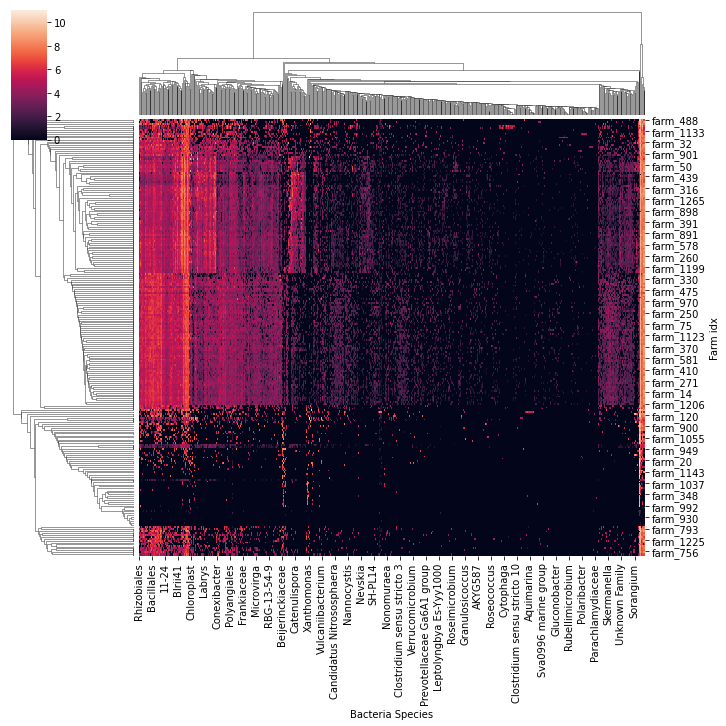

In [ ]:
f = sns.clustermap(bacteria_counts_lognorm)
f.ax_heatmap.set_ylabel('Farm idx')
f.ax_heatmap.set_xlabel('Bacteria Species')
plt.show()

Wow, there's a lot going on here! If you'd like to look at a subset of the data, try using only a small chunk of the data. For example, if you wanted to look at the first 20 farms in the dataset, you would use the line below.


```
f = sns.clustermap(bacteria_counts_lognorm[:20])
```
Try a different number in the cell above!


####**Exercise: Answer the following questions:**
1. What does it mean if two bacteria got clustered nearby each other?
2. Are there any outlier features or samples?
3. Can you think of any other fields that might use unsupervised learning? (Hint: Spotify is very famous for its unsupervised learning methods)


In [ ]:
_1_ = '' #@param {type:"string"}
_2_ = '' #@param {type:"string"}
_3_ = '' #@param {type:"string"}

# OPTIONAL: Measuring Bacterial Composition

How did we get the measurements of our different bacteria in the first place?  This section explores the modern experimental and computational methods that scientists in order to measure bacterial abundance.

## DNA Sequencing 

Nowadays, measuring the amounts of different species of bacteria in a sample is done through a type of *DNA sequencing* called **16S sequencing**.


**Quick Question: What is DNA? If you haven't taken biology recently, ask one of your teammates!  Team work makes the dream work.**

DNA sequencing involves using a special machine that can take a piece of DNA and figure out the order of the nucleotides/nitrogenous bases (the building blocks of DNA) that the DNA is composed of.

<img src="https://blog.albert.io/wp-content/uploads/2016/04/Nucleotide.png" alt="drawing" width="300" >

**Quick Question: What are the 4 nucleotides that make up DNA? Again, refer to whoever is the resident biology expert if you can't remember!**


If you want to learn more about sequencing on your own time, check out [this article](https://www.khanacademy.org/science/high-school-biology/hs-molecular-genetics/hs-biotechnology/a/dna-sequencing). 




## The 16S Barcode

Bacteria have a very special region in their DNA called the **16S region**. Every species of bacteria has a different DNA sequence in their 16S region, and scientists have created a huge catalog of the 16S sequence in thousands of species of bacteria. 


The 16S region acts like a "barcode."  Let's give a little metaphor. During 16S sequencing:
1.  To measure the amount of bacteria in a sample (analagous to "the shopping cart" in this extended metaphor), all of the bacteria are put into a test tube (onto the register at the grocery store) with some special chemicals.
2.  The sequencing machine (the cashier's barcode scanner) reads the 16S sequence (the barcode!) of every bacterial cell in the sample and logs it in the computer.
3.  Then the computer looks up what species of bacteria (grocery item) each 16S sequence/barcode belongs to, and tallies up the total number of each bacteria. 


P.S. DNA sequencing is getting drastically more efficient, so sequencing your sample might actually be cheaper and faster than your grocery run these days :)

<img src="https://static.scientificamerican.com/sciam/cache/file/354C5183-DB53-432A-92B3FC4BA3E99297_source.jpg
" width=500>



<img src="https://upload.wikimedia.org/wikipedia/commons/b/bd/DNA_Barcoding.png" width=500>




---


## From Barcodes to Bacterial Counts



Let's look at what our ```sequences_counts``` dataframe looks like right now. **Discuss: what are the rows and what are the columns?**

In [ ]:
sequences_counts.head()

,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,TACAGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGCTTTTTAAGTCGGATGTGAAATCCCCGAGCTTAACTTGGGAATTG,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGGCGGTTTTGTAAGTCAGATGTGAAAGCCCCGGGCTCAACCTGGGAACTG,TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGACTCTTAAGTCGGGGGTGAAAGCCCAGGGCTCAACCCTGGAATTG,TACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGT,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGCGCTTAACGTGGGAACTG,TACGTAGGGTGCTAGCGTTGTTCGGAATCATTGGGCGTAAAGCGCGTGTAGGCTGTCAATTAAGTCGGGTGTGAAAGCCCTCGGCTCAACCGAGGAAGTG,TACAGAGGGTGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGCGCGTGTAGGCGGCTTTGCAAGTCGGGTGTGAAAGCCCTCAGCTCAACTGAGGAAGTG,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGGCGGTCCGTTGTGTCTGCGGTGAAATCCCCGGGCTTAACCTGGGAATGG,TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGACTGGAAAGTCAGAGGTGAAATCCCAGGGCTCAACCTTGGAACTG,TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGCGCACGTAGGCGGCTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAACTCCAGAACTG,TACGTAGGGTGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCGGCCGTGAAATCTCCACGCTTAACGTGGAGCGTG,TACAGAGGATGCAAGCGTTATCCGGAATGATTGGGCGTAAAGCGTCTGTAGGTGGCTTTTTAAGTCCGCCGTCAAATCCCAGGGCTCAACCCTGGACAGG,GACAGAGGGTGCAAACGTTGTTCGGAATTACTGGGCATAAAGAGCACGTAGGTGGTGCGCTAAGTCACGTGTGAAATCCCCCGGCTCAACCGGGGAATTG,GACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGAGTGTAGGTGGTTTGCCAAGTTGGGTGTTAAAGCCTTGAGCTCAACTCAAGAAATG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGACGGTTGCGTAAGTCAGATGTGAAAGCCCCGGGCTCAACCTGGGAATTG,TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTCTGTCACGTCGGATGTGAAAACTCGGGGCTCAACCCCGAGCCTG,TACGTAGGGTCCGAGCGTTGTCCGGAATTACTGGGCGTAAAGAGCTCGTAGGTGGTTTGTCGCGTTGTCCGTGAAAACTCACAGCTCAACTGTGGGCGTG,TACGTAGGTGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGTTTGTTAAGTCAGCTGTGAAAGCCCGGGGCTCAACCCCGGAGGGT,TACGGGGGGGGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCTCGTAGGCGGCCAACTAAGTCGGACGTGAAATCCCTCGGCTTAACCGGGGAACTG,TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTTAGAGGTGAAAGCCCGGGGCTCAACTCCGGAATTG,GACGAACCTTGCTAACGTTATTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCGGTGCAGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTG,TACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTCTCAAGTCAGGGGTGAAAGCCCAGAGCTCAACTCTGGAATTG,TACGAGGGGGGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTTTGGTAAGTCTGATGTGAAATCTATGGGCTCAACTCATAGTCTG,TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGTGCGTAGGCGGATCAATAAGTAAGGGGTGAAATCCCGAGGCTCAACCTCGGAACTG,TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGTCCTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGT,TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGCGGCGCGGTAAGTCGGGTGTGAAATCTCGGGGCTTAACTCCGAAACTG,TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGCGGCGCGGTAAGTCGGGTGTGAAATCTCGGAGCTTAACTCCGAAACTG,TACGTAGGGGGCTAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCGTGTAGGCGGCCAGGTAGGTCTGCTGTGAAAACTCGAGGCTCAACCTCGAGACGT,TACGAGGGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGTGCGGTAAGTCACCTGTGAAAACTCTGGGCTCAACTCAGAGCCTG,TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAACTCCAGAACTG,TACGTAGGGGGCTAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCGTGTAGGCGGCCCGGTAAGTCCGCTGTGAAAGTCGGGGGCTCAACCCTCGGATGC,TACGGGGGGGGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCTCGTAGGCGGCCAACTAAGTCAGACGTGAAATCCCTCGGCTTAACCGGGGAACTG,TACGAAGGGTGCAAACGTTGCTCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGCTTGGCAAGTCGGATGTGAAATCCCTCGGCTCAACCAAGGAAGTG,TACGTAGGGGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCGCGTAGGCGGTCCGATAAGTCGGCTGTGAAAGTCAGGGGCTCAACCCTTGAAAGC,TACGGGGGGTGCGAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTTTGATAAGGGTGTGGTGAAAGTCCGGGGCTCAACCCCGGATCTG,TACGTAGGGGGCGAGCGTTGTCCGGAGTTACTGGGCGTAAAGCGCACGCAGGCGGTCAACCAAGTTTGAAGTGACAGTTGGTGGCTCAACCACCAAAGTG,TACGTAGGCAGCGAGCGTTGTTCGGAGTTACTGGGCGTAAAGAGTGCGTAGGCGGTTTTCTAAGTTTGGTGTGAAATCTCCCGGCTTAACTGGGAGGGTG,TACAGAGGGTGCGAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGCTCAGTAAGGTTGCGGTGAAAGCCCGGGGCTCAACCCCGGGTCGG,TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGTGCGG

In [ ]:
#@title ##### We want to get our counts in terms of different bacteria (remember that each sequences maps to a type of bacteria). Something that looks like this (run this cell):
bacteria_counts[bacteria_counts.columns[20::20]].head()

,Modestobacter,Citrifermentans,Azospirillaceae,Rhizobacter,Desulfovibrio,Lewinella,Inquilinus,Lactococcus,BIrii41,Haliangium,Atopostipes,Skermanella,Saprospiraceae,Corynebacterium,Hamadaea,Legionella,LD29,Nitrososphaeraceae,Pseudonocardia,Pseudomonas,Magnetospirillaceae,Micromonosporaceae,OLB14,Aliterella,Oligoflexus,Turneriella,11-24,Pseudonocardiaceae,Dechloromonas,Streptomycetaceae,Psychromonas,Dyella
farm_0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,171.0,0.0,0.0,0.0,174.0,0.0,0.0,0.0,33.0,66.0,2592.0,0.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286.0,0.0,0.0
farm_1,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,136.0,1141.0,0.0,15.0,5.0,3.0,0.0,3.0,0.0,137.0,172.0,144.0,0.0,222.0,0.0,0.0,0.0,0.0,137.0,85.0,4.0,34.0,0.0,0.0
farm_2,0.0,0.0,5.0,936.0,0.0,0.0,87.0,0.0,907.0,1027.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,48.0,99.0,114.0,104.0,0.0,0.0,0.0,40.0,98.0,27.0,0.0,20.0,0.0,0.0
farm_3,20.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,239.0,1064.0,0.0,65.0,0.0,8.0,0.0,0.0,0.0,211.0,142.0,205.0,0.0,195.0,0.0,0.0,0.0,0.0,254.0,48.0,0.0,26.0,0.0,0.0
farm_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,327.0,0.0,0.0,0.0,0.0,0.0,27082.0,0.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are going to perform an algorithm in 3 steps.
1. Label each sequence (barcode) with the bacteria that correpsonds to that particular barcode. You can look this up using the dictionary ```sequence_to_species_dict```.
2. Group barcodes/sequences that correspond to the same bacteria species together using the ```pandas``` ```groupby``` function.
3. Use the ```pandas``` ```.sum()``` function to sum together the counts of all sequences that correspond to the same bacteria species.

Fill in the code below to perform this algorithm.

In [ ]:
# The groupby function works better when we are aggregating over columns, 
# so we transpose our data.
sequences_counts_t = sequences_counts.transpose() 

# Step 1: Create a new column called "species" that corrsponds to the species of a given barcode, 
# per looked up in the dictionary.
sequences_counts_t['species'] = [sequence_to_species_dict[i] for i in sequences_counts_t.index]


# Step 2: Use the pandas "groupby" function to group sequences together by species.
# and Step 3: Use the .sum() function to sum together the counts of the grouped sequences.
summed_data = sequences_counts_t.groupby('species').sum()

# Finally, we will re-transpose the data so that our columns are bacteria and our rows are each farm.
bacteria_counts = summed_data.transpose()
bacteria_counts.head()

species,0319-6G20,0319-7L14,053A03-B-DI-P58,11-24,1174-901-12,1921-2,1959-1,27F-1492R,37-13,67-14,A0839,A21b,A4b,AAP99,AB1,AD3,AKYG587,AKYH767,AT-s3-28,Abditibacterium,Absconditabacteriales (SR1),Acetobacteraceae,Acidibacter,Acidimicrobiia,Acidiphilium,Acidisphaera,Acidobacteriaceae (Subgroup 1),Acidobacteriae,Acidobacteriales,Acidobacteriota,Acidothermus,Acinetobacter,Actinoallomurus,Actinobacteria,Actinobacteriota,Actinocorallia,Actinomadura,Actinomyces,Actinomycetospora,Actinophytocola,...,Unclassified,Undibacterium,Unknown Family,Vampirovibrionaceae,Vampirovibrionales,Variovorax,Veillonella,Vermiphilaceae,Verrucomicrobiaceae,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobium,Vibrio,Vicinamibacter,Vicinamibacteraceae,Vicinamibacterales,Vulcaniibacterium,Vulgatibacter,WD2101 soil group,WD260,WPS-2,WS2,WX65,Weeksellaceae,Woesearchaeales,Xanthobacteraceae,Xanthomonadaceae,Xanthomonadales,Xanthomonas,YC-ZSS-LKJ147,Yersiniaceae,bac2nit3,bacteriap25,cvE6,env.OPS 17,mle1-27,mle1-7,possible genus 04,uncultured,vadinHA49
farm_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,18.0,186.0,0.0,0.0,0.0,2615.0,0.0,0.0,0.0,247.0,121.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,...,996.0,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,1.0,0.0,58.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,6422.0,2.0
farm_1,32.0,0.0,0.0,137.0,0.0,3.0,0.0,3.0,0.0,489.0,25.0,23.0,68.0,0.0,0.0,318.0,0.0,69.0,0.0,15.0,0.0,57.0,422.0,105.0,20.0,0.0,59.0,49.0,316.0,55.0,274.0,10.0,30.0,75.0,0.0,0.0,0.0,0.0,5.0,0.0,...,1996.0,0.0,6.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,19.0,0.0,0.0,685.0,0.0,126.0,0.0,2.0,0.0,0.0,328.0,0.0,156.0,4.0,6.0,0.0,0.0,229.0,2.0,16.0,52.0,44.0,38.0,10988.0,66.0
farm_2,38.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,1.0,114.0,45.0,3.0,254.0,0.0,0.0,38.0,0.0,63.0,0.0,9.0,0.0,22.0,579.0,15.0,2.0,0.0,85.0,36.0,280.0,52.0,191.0,0.0,0.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2597.0,0.0,0.0,0.0,388.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,4.0,154.0,2.0,0.0,0.0,296.0,0.0,55.0,0.0,2.0,0.0,0.0,328.0,0.0,133.0,0.0,0.0,0.0,0.0,134.0,4.0,128.0,38.0,51.0,33.0,6860.0,43.0
farm_3,62.0,0.0,0.0,254.0,0.0,0.0,0.0,3.0,0.0,351.0,16.0,53.0,39.0,0.0,0.0,681.0,0.0,39.0,0.0,2.0,0.0,23.0,216.0,21.0,31.0,24.0,136.0,43.0,337.0,29.0,488.0,0.0,4.0,84.0,0.0,2.0,14.0,0.0,0.0,9.0,...,1916.0,4.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,25.0,319.0,8.0,45.0,11.0,585.0,0.0,121.0,0.0,0.0,0.0,0.0,478.0,5.0,199.0,58.0,4.0,0.0,0.0,653.0,5.0,35.0,53.0,166.0,72.0,12701.0,64.0
farm_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1712.0,4778.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8750.0,0.0


Run the next cell and **discuss: what do you notice about the shape of the ```sequence_counts``` dataframe and the ```bacteria_counts``` dataframe? Why are the shapes different?**

In [ ]:
print('Shape of sequence_counts:', np.shape(sequences_counts))
print('Shape of bacteria_counts:', np.shape(bacteria_counts))

Shape of sequence_counts: (1344, 8844)
Shape of bacteria_counts: (1344, 650)


In [ ]:
bacteria_counts

species,0319-6G20,0319-7L14,053A03-B-DI-P58,11-24,1174-901-12,1921-2,1959-1,27F-1492R,37-13,67-14,A0839,A21b,A4b,AAP99,AB1,AD3,AKYG587,AKYH767,AT-s3-28,Abditibacterium,Absconditabacteriales (SR1),Acetobacteraceae,Acidibacter,Acidimicrobiia,Acidiphilium,Acidisphaera,Acidobacteriaceae (Subgroup 1),Acidobacteriae,Acidobacteriales,Acidobacteriota,Acidothermus,Acinetobacter,Actinoallomurus,Actinobacteria,Actinobacteriota,Actinocorallia,Actinomadura,Actinomyces,Actinomycetospora,Actinophytocola,...,Unclassified,Undibacterium,Unknown Family,Vampirovibrionaceae,Vampirovibrionales,Variovorax,Veillonella,Vermiphilaceae,Verrucomicrobiaceae,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobium,Vibrio,Vicinamibacter,Vicinamibacteraceae,Vicinamibacterales,Vulcaniibacterium,Vulgatibacter,WD2101 soil group,WD260,WPS-2,WS2,WX65,Weeksellaceae,Woesearchaeales,Xanthobacteraceae,Xanthomonadaceae,Xanthomonadales,Xanthomonas,YC-ZSS-LKJ147,Yersiniaceae,bac2nit3,bacteriap25,cvE6,env.OPS 17,mle1-27,mle1-7,possible genus 04,uncultured,vadinHA49
farm_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,18.0,186.0,0.0,0.0,0.0,2615.0,0.0,0.0,0.0,247.0,121.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,...,996.0,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,1.0,0.0,58.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,6422.0,2.0
farm_1,32.0,0.0,0.0,137.0,0.0,3.0,0.0,3.0,0.0,489.0,25.0,23.0,68.0,0.0,0.0,318.0,0.0,69.0,0.0,15.0,0.0,57.0,422.0,105.0,20.0,0.0,59.0,49.0,316.0,55.0,274.0,10.0,30.0,75.0,0.0,0.0,0.0,0.0,5.0,0.0,...,1996.0,0.0,6.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,19.0,0.0,0.0,685.0,0.0,126.0,0.0,2.0,0.0,0.0,328.0,0.0,156.0,4.0,6.0,0.0,0.0,229.0,2.0,16.0,52.0,44.0,38.0,10988.0,66.0
farm_2,38.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,1.0,114.0,45.0,3.0,254.0,0.0,0.0,38.0,0.0,63.0,0.0,9.0,0.0,22.0,579.0,15.0,2.0,0.0,85.0,36.0,280.0,52.0,191.0,0.0,0.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2597.0,0.0,0.0,0.0,388.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,4.0,154.0,2.0,0.0,0.0,296.0,0.0,55.0,0.0,2.0,0.0,0.0,328.0,0.0,133.0,0.0,0.0,0.0,0.0,134.0,4.0,128.0,38.0,51.0,33.0,6860.0,43.0
farm_3,62.0,0.0,0.0,254.0,0.0,0.0,0.0,3.0,0.0,351.0,16.0,53.0,39.0,0.0,0.0,681.0,0.0,39.0,0.0,2.0,0.0,23.0,216.0,21.0,31.0,24.0,136.0,43.0,337.0,29.0,488.0,0.0,4.0,84.0,0.0,2.0,14.0,0.0,0.0,9.0,...,1916.0,4.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,25.0,319.0,8.0,45.0,11.0,585.0,0.0,121.0,0.0,0.0,0.0,0.0,478.0,5.0,199.0,58.0,4.0,0.0,0.0,653.0,5.0,35.0,53.0,166.0,72.0,12701.0,64.0
farm_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1712.0,4778.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8750.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
farm_1339,39.0,0.0,0.0,140.0,1.0,0.0,0.0,0.0,3.0,155.0,67.0,6.0,470.0,0.0,0.0,73.0,0.0,47.0,3.0,28.0,0.0,12.0,752.0,24.0,8.0,0.0,52.0,101.0,134.0,50.0,132.0,1.0,3.0,157.0,0.0,4.0,5.0,0.0,0.0,0.0,...,2145.0,0.0,5.0,0.0,45.0,0.0,0.0,46.0,5.0,3.0,0.0,0.0,0.0,8.0,317.0,3.0,0.0,0.0,298.0,0.0,10.0,0.0,0.0,0.0,0.0,203.0,0.0,159.0,6.0,6.0,0.0,0.0,246.0,0.0,151.0,43.0,110.0,7.0,7733.0,30.0
farm_1340,22.0,0.0,0.0,181.0,17.0,0.0,0.0,4.0,0.0,260.0,31.0,17.0,289.0,0.0,0.0,79.0,2.0,29.0,5.0,45.0,0.0,59.0,87.0,34.0,21.0,0.0,211.0,73.0,212.0,5.0,246.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,32.0,...,1869.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,326.0,13.0,4.0,0.0,474.0,0.0,91.0,0.0,2.0,0.0,0.0,147.0,1.0,362.0,3.0,13.0,0.0,0.0,317.0,0.0,37.0,9.0,139.0,0.0,8301.0,44.0
farm_1341,170

Now you're able to see how scientists measure the amounts of different bacterial species!

In the next notebook, you're actually going to write an algorithm that turns a list of the 16S barcodes output by the sequencer/barcode scanner into counts of different bacteria types. You will use this data to build a machine learning model to predict crop yield from bacterial composition of soil!